# **Stock Market Prediction And Forecasting Using Stacked LSTM**

**Author - Samrat Mukherjee**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('/content/drive/MyDrive/StockDataset/NSE-TATAGLOBAL.csv')

In [4]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [5]:
df.shape

(2035, 8)

In [6]:
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [7]:
df.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [9]:
# convert the data of string type to datetime
df['Date']=pd.to_datetime(df['Date'])
print(type(df.Date[0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [10]:
df=df.sort_values(by='Date')
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [11]:
df.reset_index(inplace=True,drop=True)
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
1,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
3,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
4,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  2035 non-null   datetime64[ns]
 1   Open                  2035 non-null   float64       
 2   High                  2035 non-null   float64       
 3   Low                   2035 non-null   float64       
 4   Last                  2035 non-null   float64       
 5   Close                 2035 non-null   float64       
 6   Total Trade Quantity  2035 non-null   int64         
 7   Turnover (Lacs)       2035 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 127.3 KB


# **Visualization**

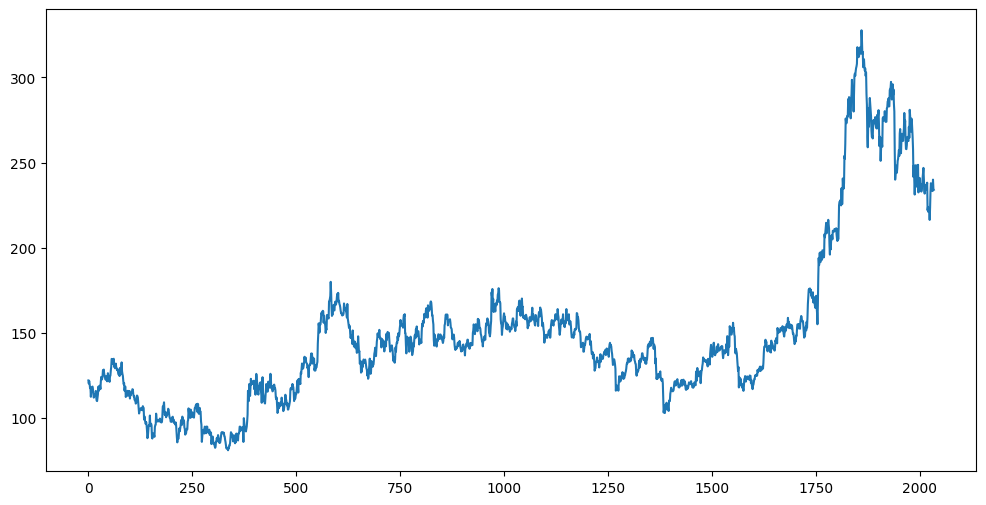

In [13]:
plt.figure(figsize=(12,6))
plt.plot(df['Open'], label='open Price')

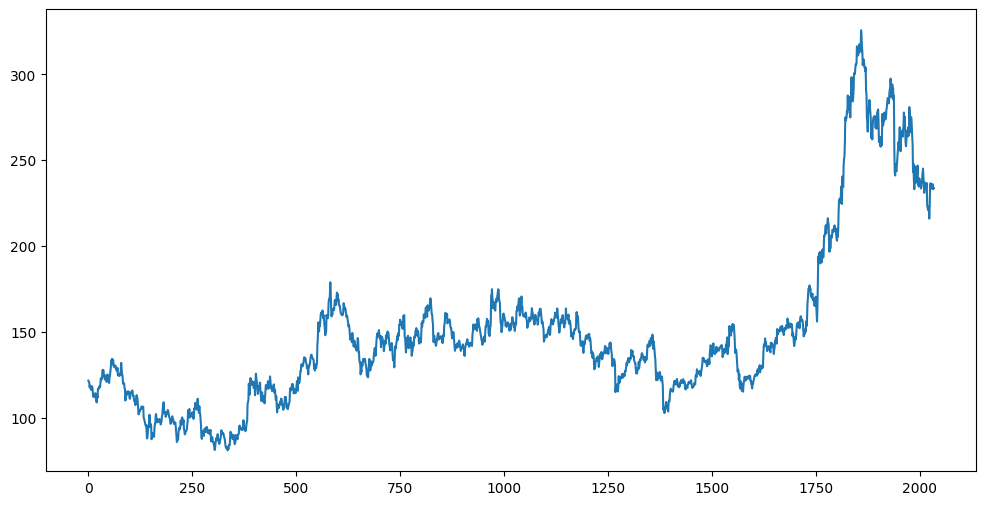

In [14]:
plt.figure(figsize=(12,6))
plt.plot(df['Close'], label='Close Price')

<ipython-input-15-24f52a15333f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


<Axes: >

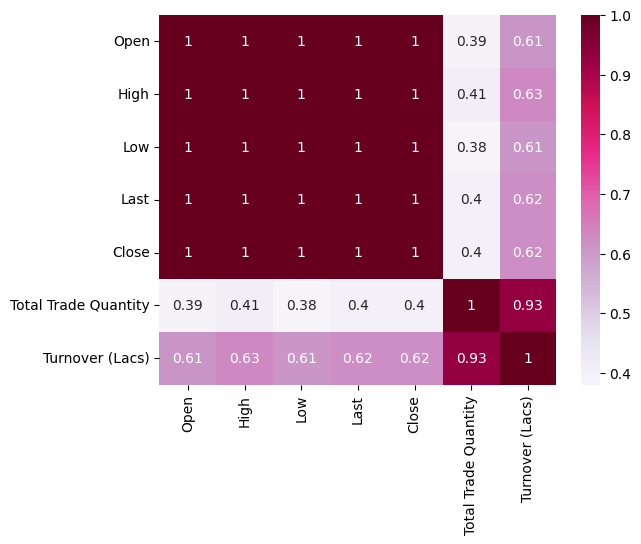

In [15]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix,cmap='PuRd',annot=True)

# **Normalization**

In [16]:
## we need to scale the data as LSTM are sensitive to the scale of the data.
scaler=MinMaxScaler(feature_range=(0,1))
df_close=df['Close']
df1=scaler.fit_transform(np.array(df_close).reshape(-1,1))
df1

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.62622549],
       [0.62214052],
       [0.62418301]])

In [17]:
#splitting dataset into train and test split
training_size=int(len(df1)*0.70)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [18]:
# Convert an array of values into a dataset matrix
def create_dataset(input_array, time_step=1):
    features, labels = [], []
    for i in range(len(input_array) - time_step - 1):
        sequence = input_array[i : (i + time_step), 0]   # Here i=0 to 100
        features.append(sequence)
        labels.append(input_array[i + time_step, 0])
    return np.array(features), np.array(labels)


In [19]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

In [20]:
# reshape input to be [samples, time steps, features] which is required for LSTM
x_train =x_train.reshape(x_train.shape[0],x_train.shape[1] , 1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1] , 1)

# **Model Building**

In [21]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import LSTM

In [22]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_absolute_error', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.fit(x_train,y_train,epochs=50,validation_split=0.1,batch_size=64,verbose=1)

Epoch 1/50
19/19 [==============================] - 14s 184ms/step - loss: 0.0684 - accuracy: 8.4034e-04 - val_loss: 0.0270 - val_accuracy: 0.0000e+00
Epoch 2/50
19/19 [==============================] - 2s 121ms/step - loss: 0.0268 - accuracy: 8.4034e-04 - val_loss: 0.0298 - val_accuracy: 0.0000e+00
Epoch 3/50
19/19 [==============================] - 3s 156ms/step - loss: 0.0243 - accuracy: 8.4034e-04 - val_loss: 0.0278 - val_accuracy: 0.0000e+00
Epoch 4/50
19/19 [==============================] - 3s 138ms/step - loss: 0.0230 - accuracy: 8.4034e-04 - val_loss: 0.0272 - val_accuracy: 0.0000e+00
Epoch 5/50
19/19 [==============================] - 2s 121ms/step - loss: 0.0219 - accuracy: 8.4034e-04 - val_loss: 0.0251 - val_accuracy: 0.0000e+00
Epoch 6/50
19/19 [==============================] - 2s 121ms/step - loss: 0.0217 - accuracy: 8.4034e-04 - val_loss: 0.0239 - val_accuracy: 0.0000e+00
Epoch 7/50
19/19 [==============================] - 2s 125ms/step - loss: 0.0206 - accuracy: 8.4034

In [24]:
## Lets do the prediction and check performance metrics
train_pred = model.predict(x_train)
test_pred = model.predict(x_test)

16/16 [==============================] - 0s 27ms/step


# **Evaluation Metrics**

In [25]:
 #Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, train_pred))

0.011956448577510378

In [26]:
#R-Square
from sklearn import metrics
np.round(metrics.r2_score(y_train, train_pred),2)

0.99

In [27]:
#Calculate RMSE performance metrics
math.sqrt(mean_squared_error(y_test, test_pred))

0.05222046211625991

In [28]:
#Transform back to original form
train_predict = scaler.inverse_transform(train_pred)
test_predict = scaler.inverse_transform(test_pred)
y_train = scaler.inverse_transform(y_train.reshape(-1,1))
y_test = scaler.inverse_transform(y_test.reshape(-1,1))

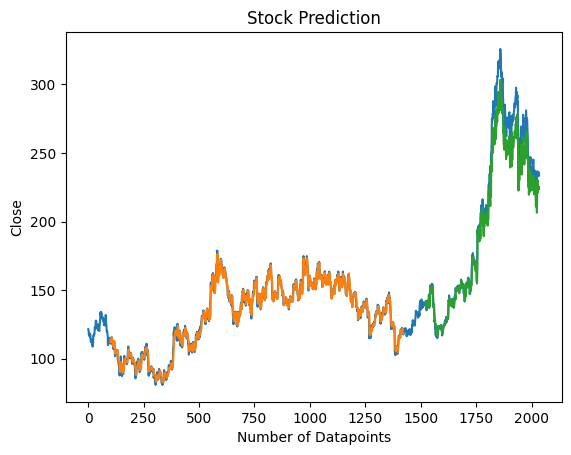

In [29]:
# Shift train prediction for plotting
look_back = 100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict

# Shift test prediction for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict) + (look_back * 2) + 1:len(df1) - 1, :] = test_predict

# Plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.xlabel('Number of Datapoints')
plt.ylabel('Close')
plt.title('Stock Prediction')
plt.show()


# **Predict the next 100 days Stock Price**

In [30]:
x_input = test_data[511:].reshape(1,-1)
x_input.shape

(1, 100)

In [31]:
n_input = list(x_input)
n_input = n_input[0].tolist()

In [32]:
# demonstrate prediction for next 100 days
from numpy import array

list_output = []
n_steps = 100
i = 0

while (i<100):

  if (len(n_input)>100):

    x_input = np.array(n_input[1:])
    print("{} day input {}".format(i, x_input))
    x_input = x_input.reshape(1, -1)
    x_input = x_input.reshape((1, n_steps, 1))
    # print(x_input)

    yhat = model.predict(x_input, verbose=0)
    print("{} day output {}".format(i, yhat))
    n_input.extend(yhat[0].tolist())
    n_input = n_input[1:]

    list_output.extend(yhat.tolist())
    i = i + 1

  else:

    x_input = x_input.reshape((1, n_steps, 1))

    yhat = model.predict(x_input, verbose=0)
    print(yhat[0])

    n_input.extend(yhat[0].tolist())
    print(len(n_input))

    list_output.extend(yhat.tolist())
    i = i+1

print(list_output)

[0.58069736]
101
1 day input [0.86213235 0.83455882 0.84375    0.71466503 0.66053922 0.65420752
 0.68035131 0.6689134  0.66421569 0.67892157 0.69138072 0.70894608
 0.72263072 0.73406863 0.72120098 0.74979575 0.7689951  0.74468954
 0.7120098  0.74673203 0.75490196 0.76041667 0.75980392 0.74652778
 0.76245915 0.77062908 0.80412582 0.78104575 0.79411765 0.76021242
 0.73488562 0.72406046 0.73999183 0.74979575 0.76143791 0.75428922
 0.74754902 0.76960784 0.7495915  0.81719771 0.80208333 0.77736928
 0.75714869 0.79370915 0.79166667 0.77144608 0.75265523 0.72691993
 0.6629902  0.68198529 0.64419935 0.62152778 0.6439951  0.66319444
 0.67544935 0.63705065 0.64603758 0.65890523 0.65870098 0.67790033
 0.63194444 0.63112745 0.62785948 0.64767157 0.63991013 0.63480392
 0.63868464 0.62336601 0.62745098 0.63970588 0.64705882 0.66196895
 0.67075163 0.65196078 0.63112745 0.61294935 0.6376634  0.62254902
 0.62745098 0.63337418 0.62642974 0.63623366 0.58312908 0.57781863
 0.57230392 0.58006536 0.57618464

In [33]:
day_new = np.arange(1,101)
day_pred = np.arange(101,201)

In [34]:
df2 = df1.tolist()
predictions=list_output
df2.extend(predictions)

Text(0.5, 1.0, 'Stock prediction')

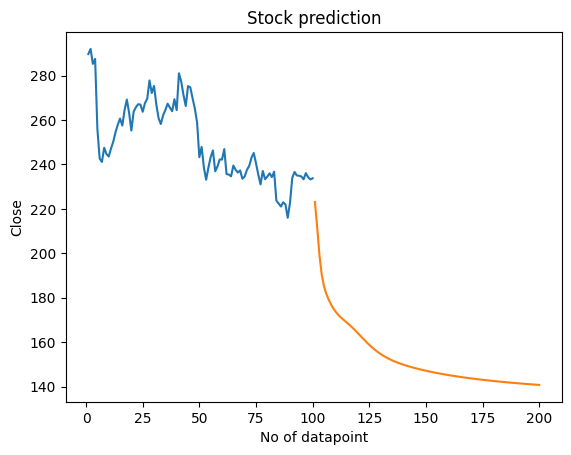

In [35]:
plt.plot(day_new, scaler.inverse_transform(df1[1935:]))
plt.plot(day_pred, scaler.inverse_transform(predictions))
plt.xlabel('No of datapoint')
plt.ylabel('Close')
plt.title('Stock prediction')